In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import pickle
import json

In [6]:
boston_data=pd.read_csv('boston_data.csv')
boston_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

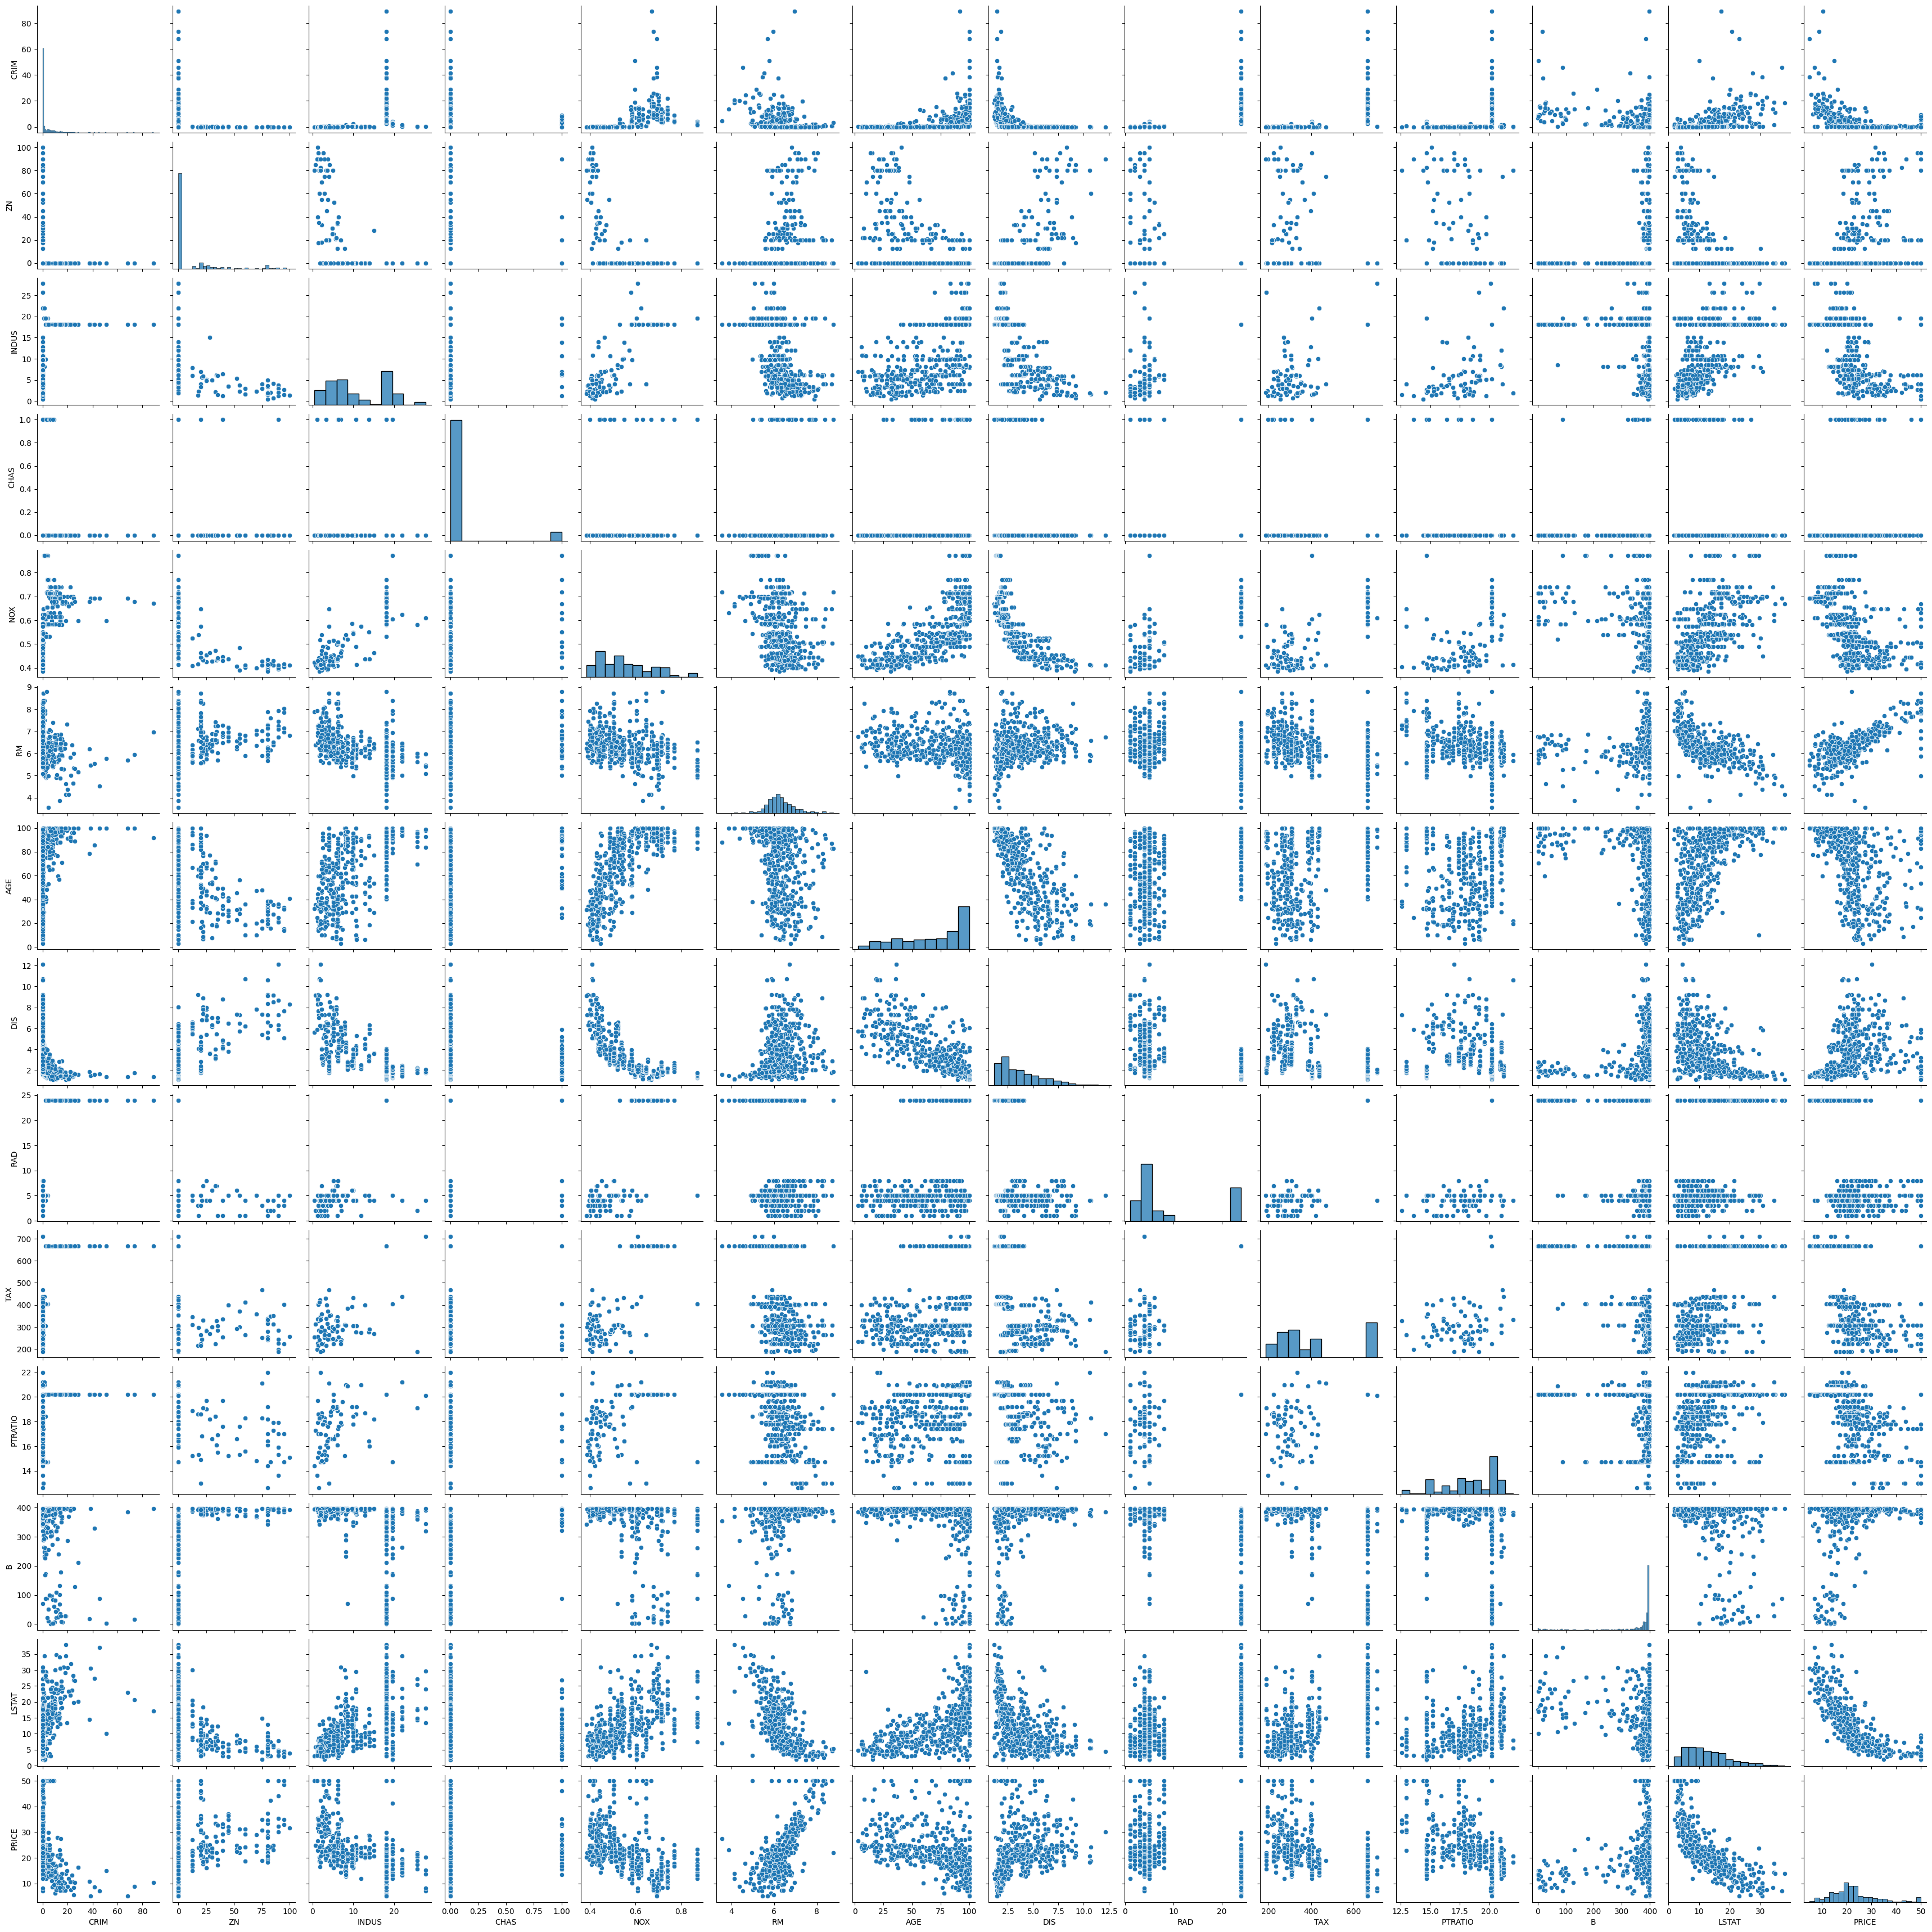

In [ ]:
sns.pairplot(boston_data)

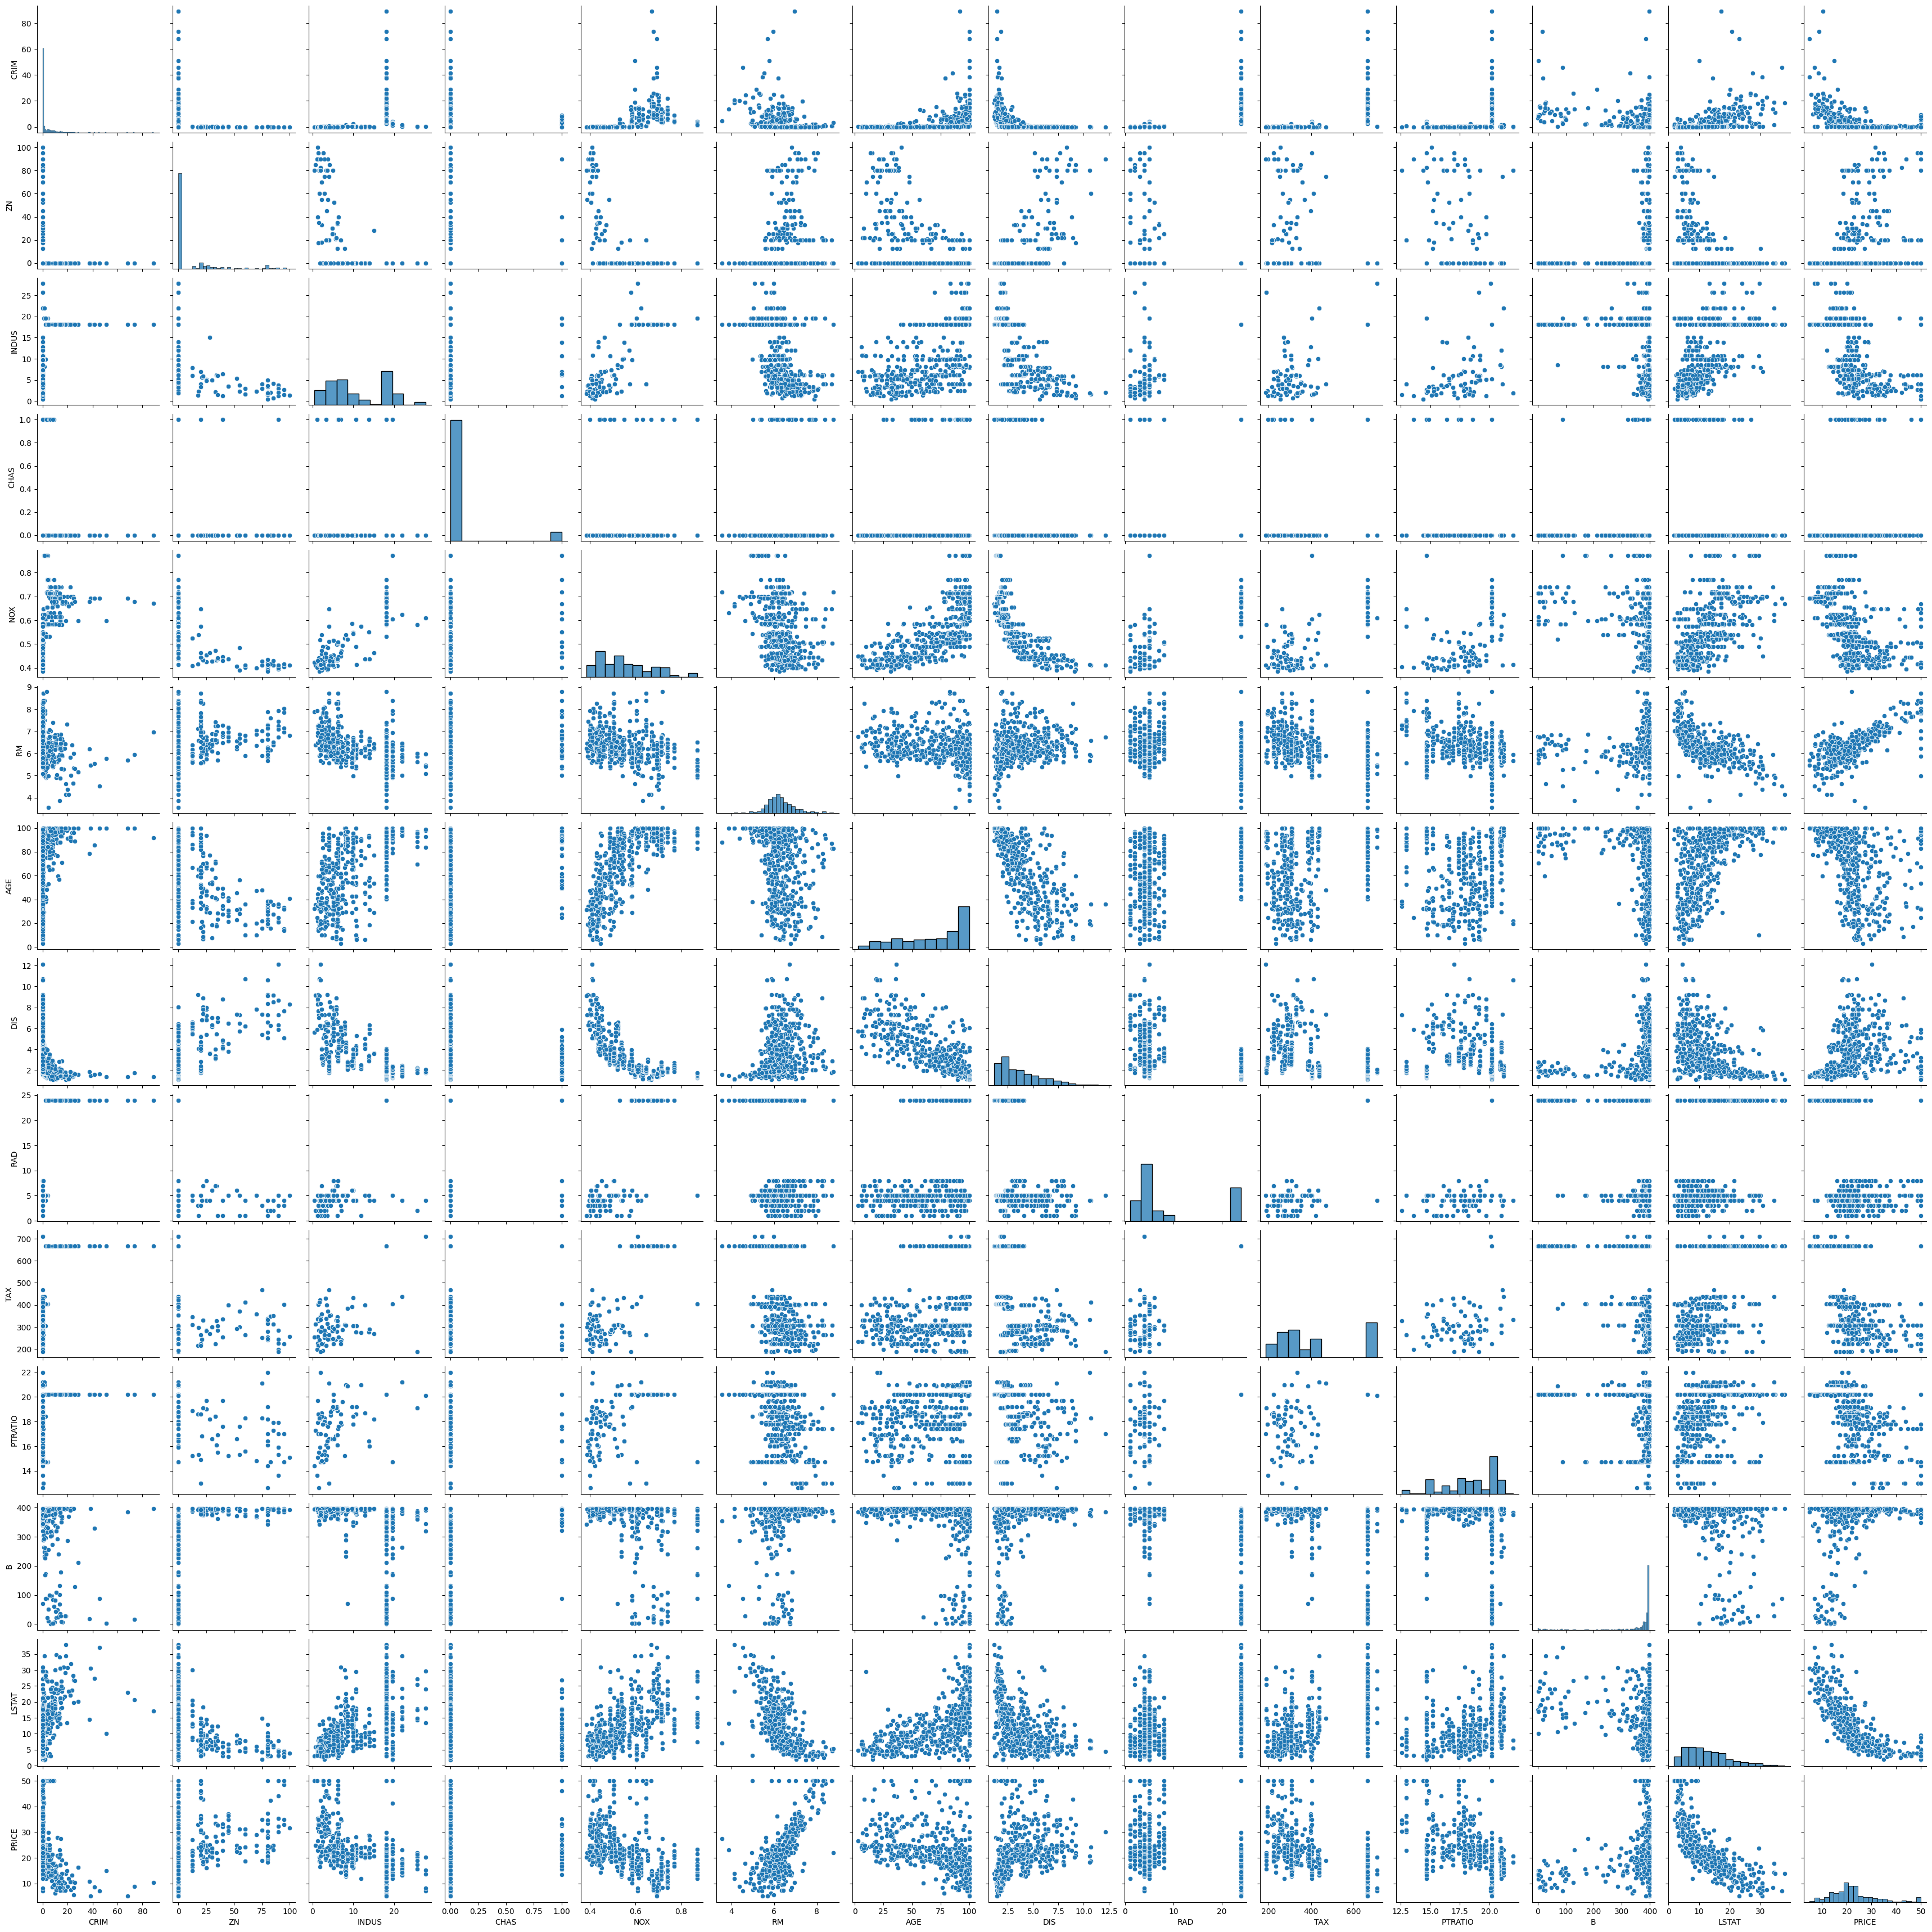

In [ ]:
sns.pairplot(boston_data)

In [ ]:
boston_data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [ ]:
boston_data.corr().tail(1)

CRIM        ZN     INDUS     CHAS       NOX       RM       AGE  \
PRICE -0.388305  0.360445 -0.483725  0.17526 -0.427321  0.69536 -0.376955   

            DIS       RAD       TAX   PTRATIO         B     LSTAT  PRICE  
PRICE  0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663    1.0

<Axes: >

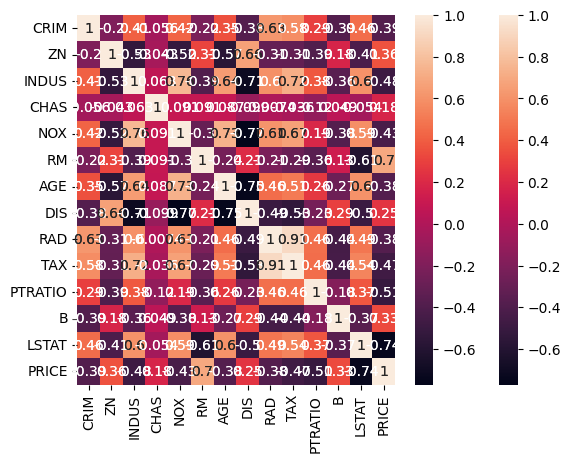

In [ ]:
sns.heatmap(boston_data.corr(),annot = True)
sns.heatmap(boston_data.corr(),annot = True)

<Axes: >

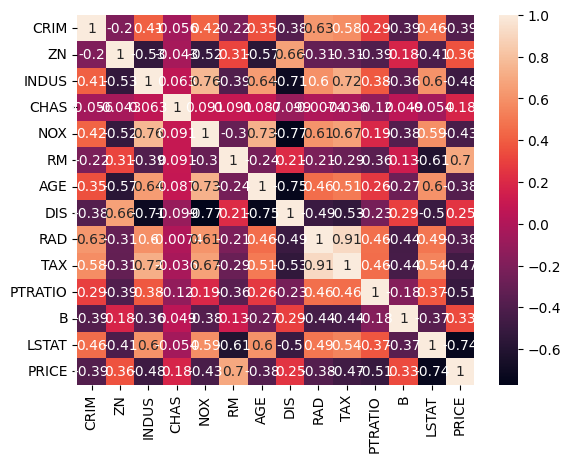

In [ ]:
sns.heatmap(boston_data.corr(),annot = True)

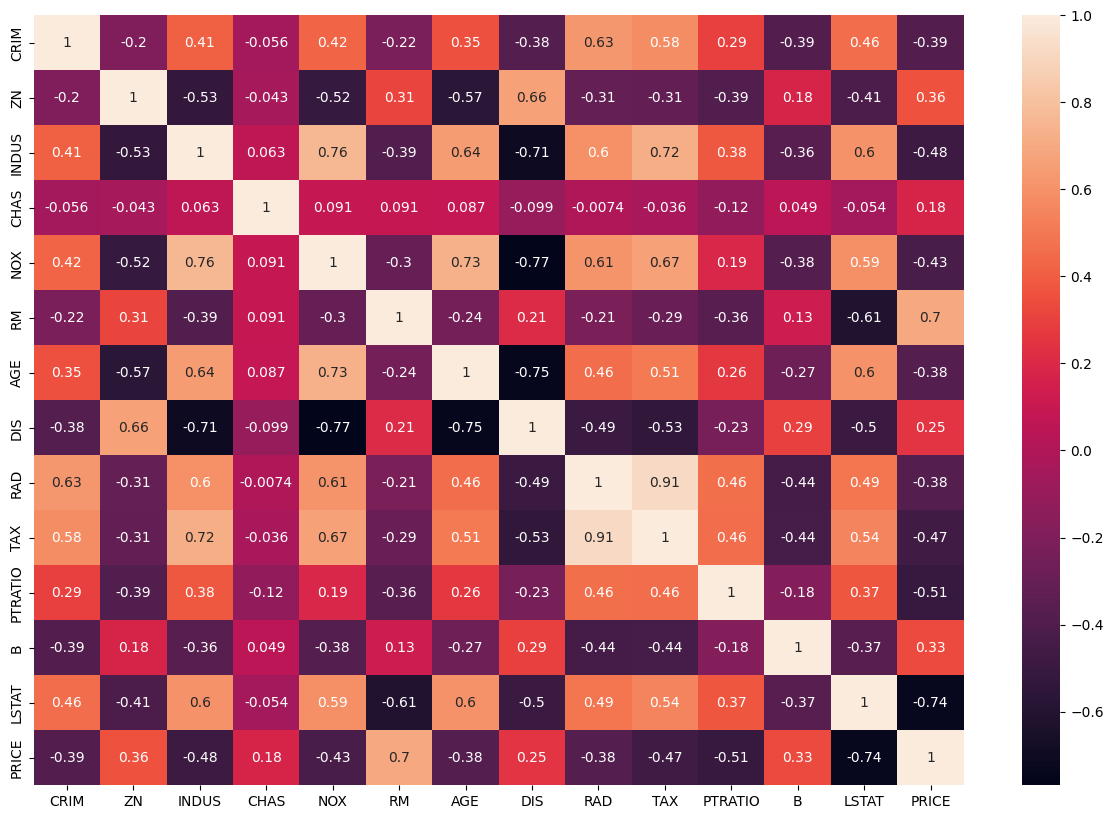

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(boston_data.corr(),annot = True)
plt.savefig('Correlation.png')

<Axes: >

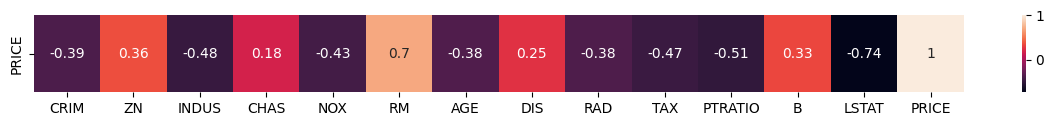

In [ ]:
plt.figure(figsize=(15,1))
sns.heatmap(boston_data.corr().tail(1),annot = True)

<Axes: >

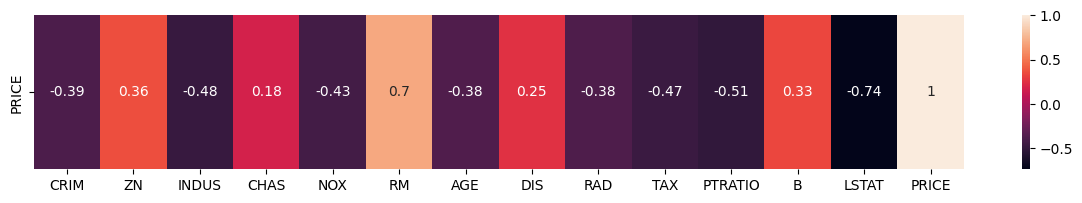

In [ ]:
plt.figure(figsize=(15,2))
sns.heatmap(boston_data.corr().tail(1),annot = True)

<Axes: >

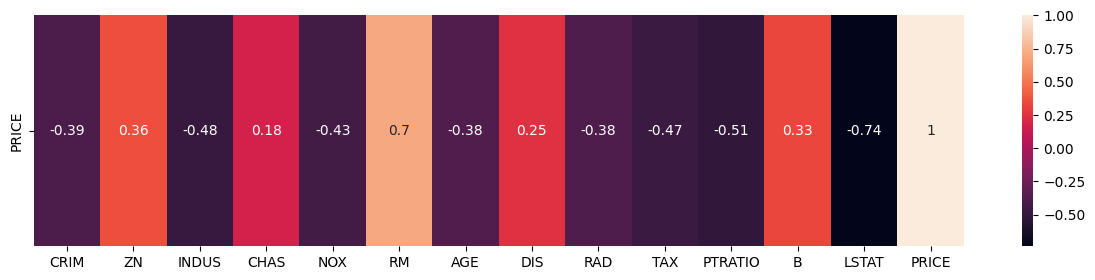

In [ ]:
plt.figure(figsize=(15,3))
sns.heatmap(boston_data.corr().tail(1),annot = True)

<Axes: >

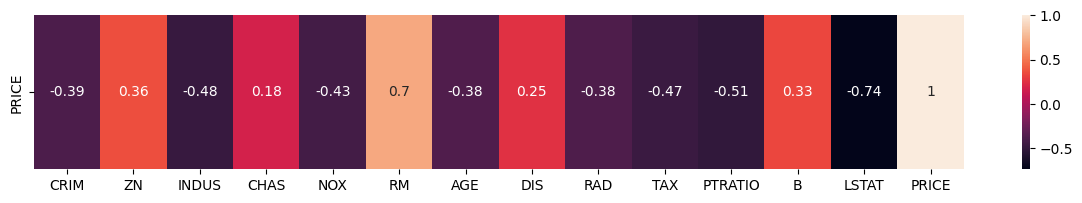

In [ ]:
plt.figure(figsize=(15,2))
sns.heatmap(boston_data.corr().tail(1),annot = True)

In [ ]:
x = boston_data.drop('PRICE',axis = 1)
y = boston_data['PRICE']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
x_train

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
215   0.19802  0.0  10.59     0  0.489  6.182  42.4  3.9454    4  277   
432   6.44405  0.0  18.10     0  0.584  6.425  74.8  2.2004   24  666   
213   0.14052  0.0  10.59     0  0.489  6.375  32.3  3.9454    4  277   
465   3.16360  0.0  18.10     0  0.655  5.759  48.2  3.0665   24  666   
35    0.06417  0.0   5.96     0  0.499  5.933  68.2  3.3603    5  279   
..        ...  ...    ...   ...    ...    ...   ...     ...  ...  ...   
170   1.20742  0.0  19.58     0  0.605  5.875  94.6  2.4259    5  403   
395   8.71675  0.0  18.10     0  0.693  6.471  98.8  1.7257   24  666   
357   3.84970  0.0  18.10     1  0.770  6.395  91.0  2.5052   24  666   
419  11.81230  0.0  18.10     0  0.718  6.824  76.5  1.7940   24  666   
118   0.13058  0.0  10.01     0  0.547  5.872  73.1  2.4775    6  432   

     PTRATIO       B  LSTAT  
215     18.6  393.63   9.47  
432     20.2   97.95  12.03  
213     18.6  385.81   9.38  
465     20.2  334.40  14.13  
35      19.2  396.90   9.68  
..       ...     ...    ...  
170     14.7  292.29  14.43  
395     20.2  391.98  17.12  
357     20.2  391.34  13.27  
419     20.2   48.45  22.74  
118     17.8  338.63  15.37  

[404 rows x 13 columns]

In [ ]:
x_test

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
33    1.15172  0.0   8.14     0  0.538  5.701  95.0  3.7872    4  307   
387  22.59710  0.0  18.10     0  0.700  5.000  89.5  1.5184   24  666   
97    0.12083  0.0   2.89     0  0.445  8.069  76.0  3.4952    2  276   
366   3.69695  0.0  18.10     0  0.718  4.963  91.4  1.7523   24  666   
173   0.09178  0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296   
..        ...  ...    ...   ...    ...    ...   ...     ...  ...  ...   
75    0.09512  0.0  12.83     0  0.437  6.286  45.0  4.5026    5  398   
319   0.47547  0.0   9.90     0  0.544  6.113  58.8  4.0019    4  304   
438  13.67810  0.0  18.10     0  0.740  5.935  87.9  1.8206   24  666   
29    1.00245  0.0   8.14     0  0.538  6.674  87.3  4.2390    4  307   
327   0.24103  0.0   7.38     0  0.493  6.083  43.7  5.4159    5  287   

     PTRATIO       B  LSTAT  
33      21.0  358.77  18.35  
387     20.2  396.90  31.99  
97      18.0  396.90   4.21  
366     20.2  316.03  14.00  
173     16.6  395.50   9.04  
..       ...     ...    ...  
75      18.7  383.23   8.94  
319     18.4  396.23  12.73  
438     20.2   68.95  34.02  
29      21.0  380.23  11.98  
327     19.6  396.90  12.79  

[102 rows x 13 columns]

In [ ]:
y_train

215    25.0
432    16.1
213    28.1
465    19.9
35     18.9
       ... 
170    17.4
395    13.1
357    21.7
419     8.4
118    20.4
Name: PRICE, Length: 404, dtype: float64

In [ ]:
y_test

33     13.1
387     7.4
97     38.7
366    21.9
173    23.6
       ... 
75     21.4
319    21.0
438     8.4
29     21.0
327    22.2
Name: PRICE, Length: 102, dtype: float64

In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(x_test)
y_pred[:5]

In [ ]:
y_pred=lr_model.predict(x_test)
y_pred[:5]

array([13.95650258,  4.73590994, 36.08872336, 15.98336069, 29.25567678])

In [ ]:
lr_model.score(x_test,y_test) # R2 Score

In [ ]:
lr_model.score(x_test,y_test)

0.6863482561363456

In [ ]:
lr_model.score(x_train,y_train)

0.7425919205497923

In [ ]:
SSE = ((y_test - y_pred)**2).sum()
SSE

np.float64(1572.9332373079951)

In [ ]:
MSE = SSE/102
MSE

np.float64(15.420914091254854)

In [ ]:
y_pred_train = lr_model.predict(x_train)
y_pred_train[:5]

array([24.8805364 , 22.56677769, 25.60337483, 18.21467406, 24.14522676])

In [ ]:
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error:",mse)
print("*"*80)

rmse  = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean ABsolute Error:",mae)
print("*"*80)

r_squared = r2_score(y_train,y_pred_train)
print("R Squared Value:",r_squared)

Mean Squared Error: 23.859733175550485
********************************************************************************
Root Mean Squared Error: 4.8846425842174455
********************************************************************************
Mean ABsolute Error: 3.452350015015771
********************************************************************************
R Squared Value: 0.7425919205497923


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
boston_data=pd.read_csv('boston_data.csv')
boston_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

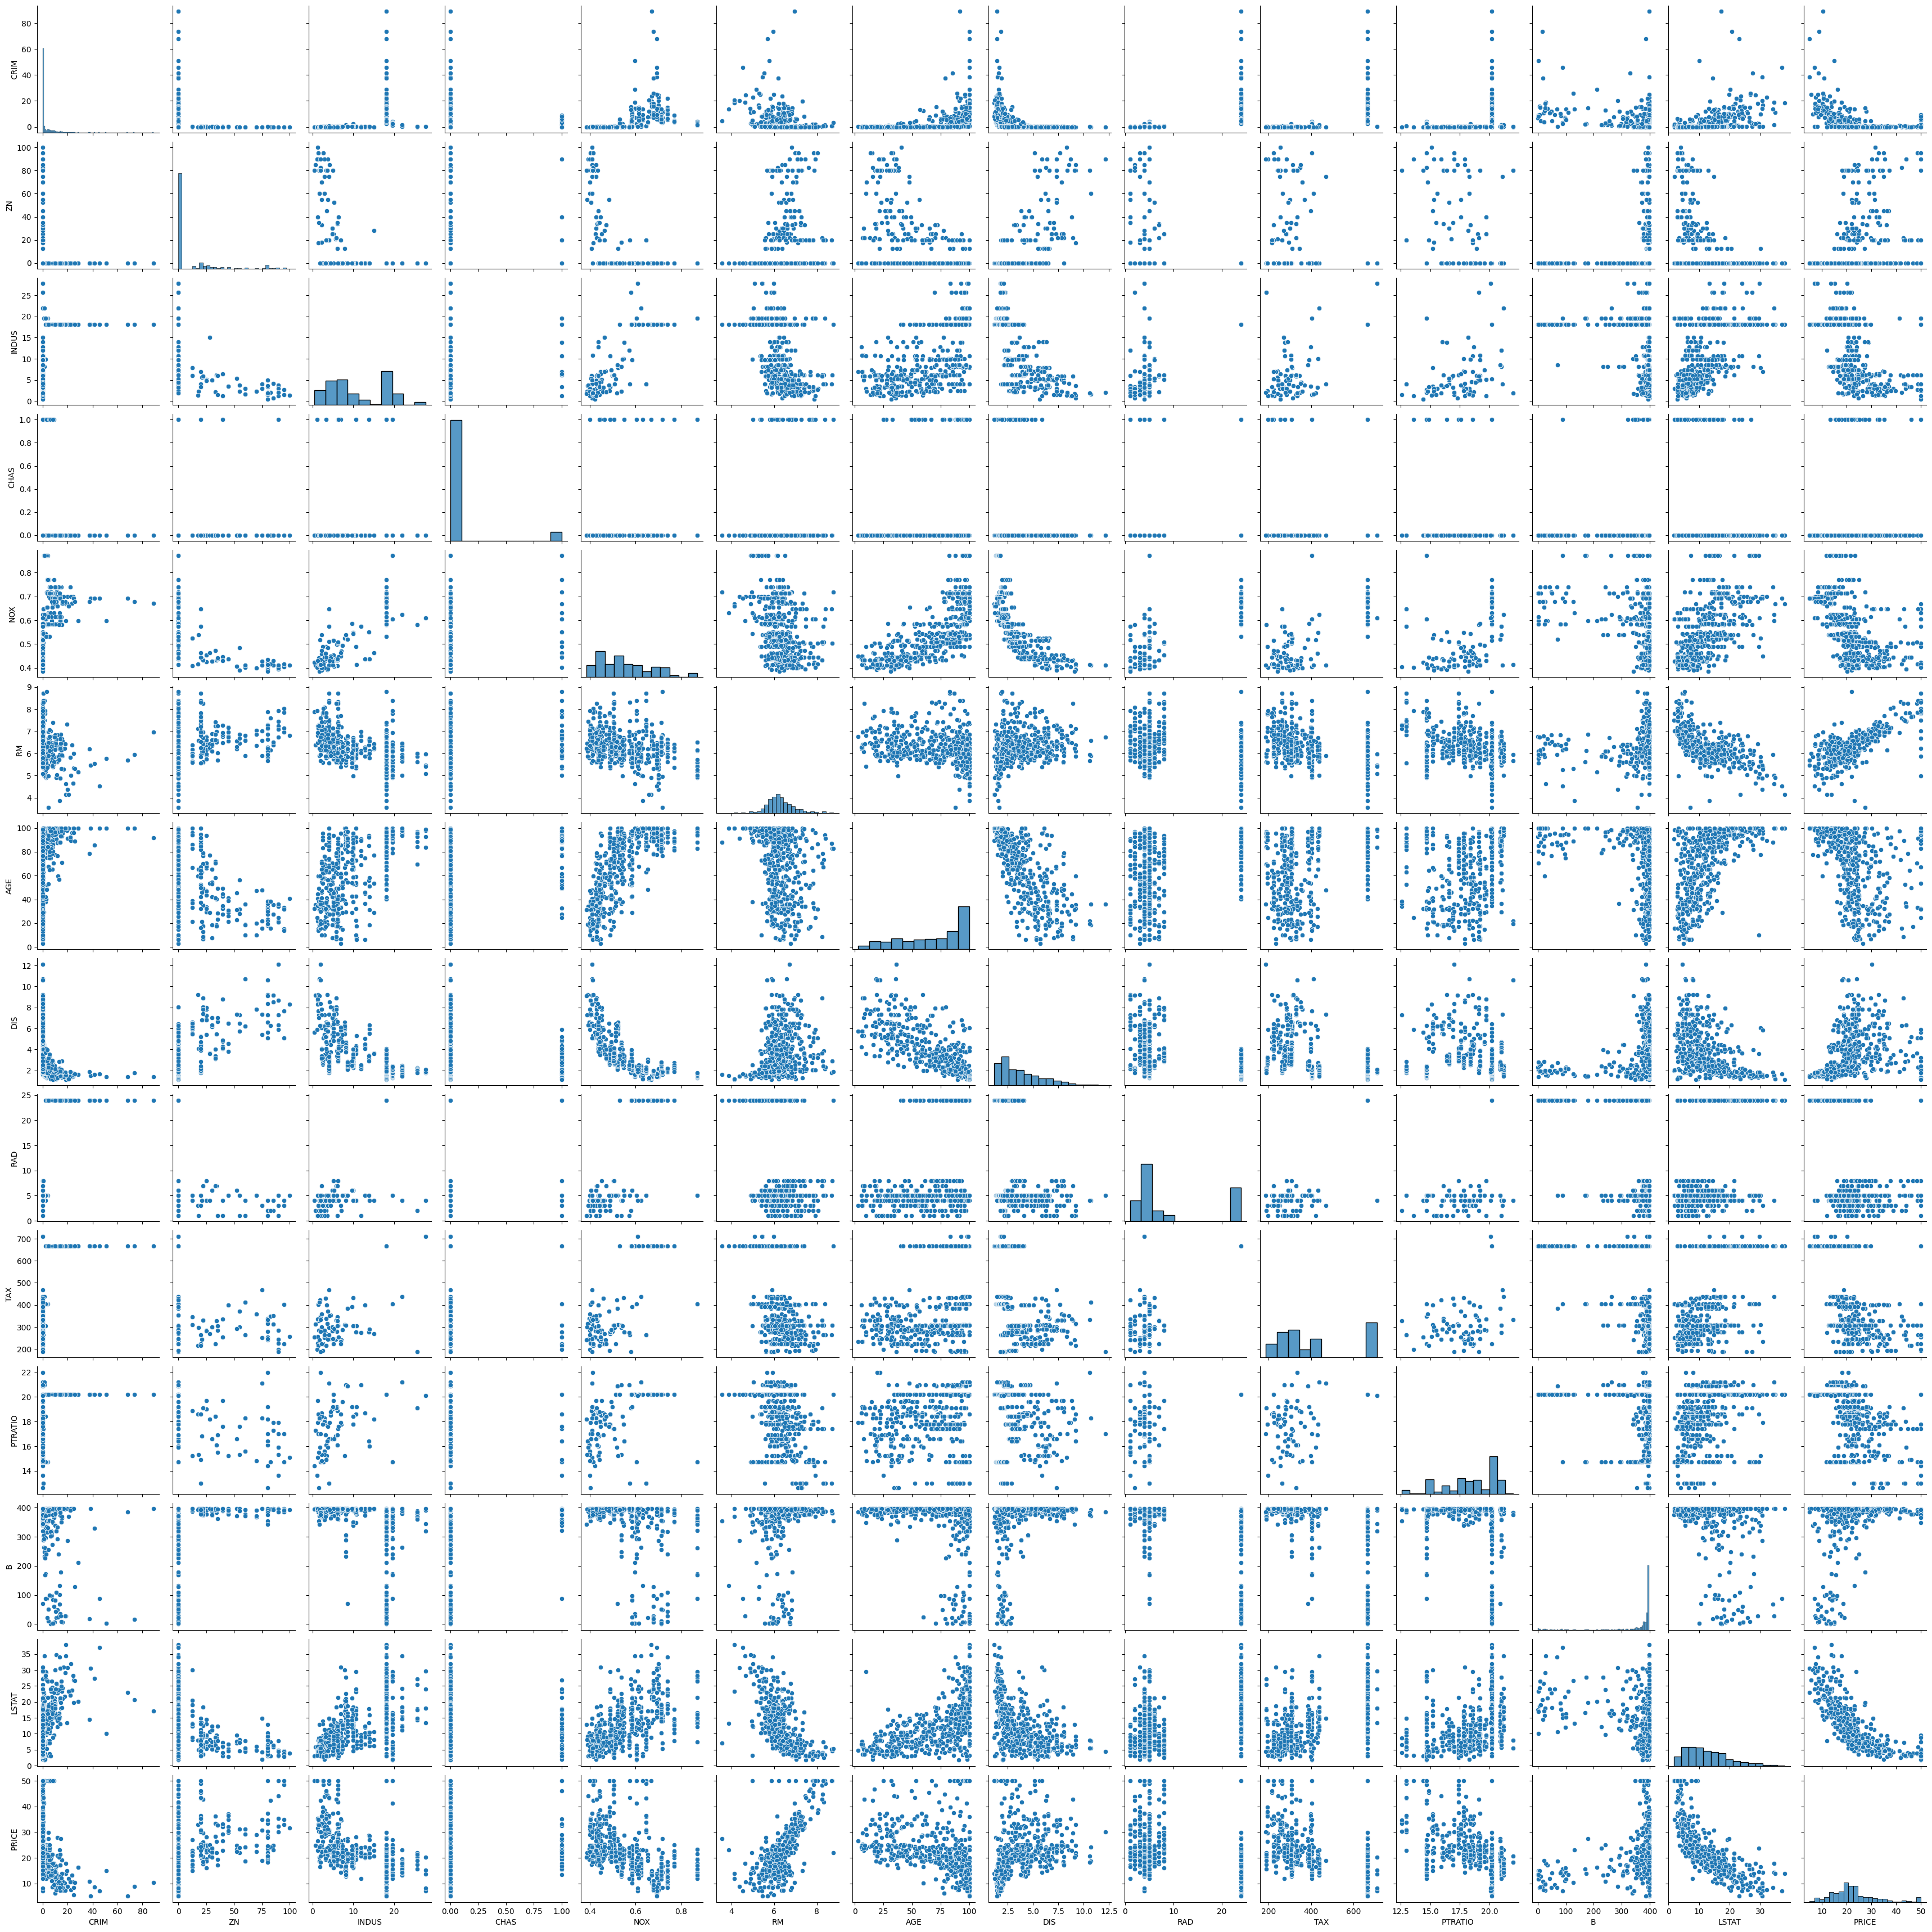

In [ ]:
sns.pairplot(boston_data)

In [ ]:
boston_data.corr().tail(4)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

<Axes: >

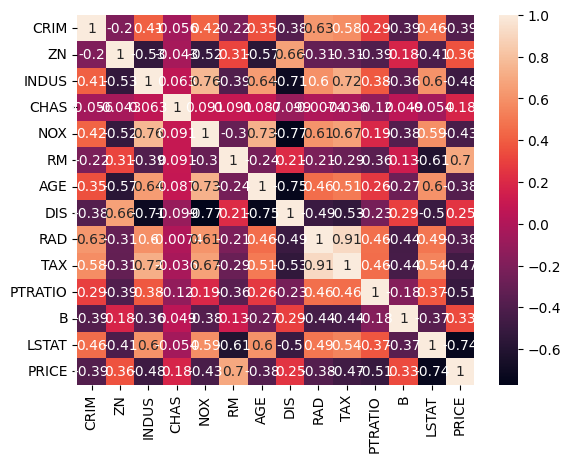

In [ ]:
sns.heatmap(boston_data.corr(),annot = True)

In [ ]:
x = boston_data.drop('PRICE',axis = 1)
y = boston_data['PRICE']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
x_train

CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
476   4.87141    0.0  18.10     0  0.614  6.484   93.6  2.3053   24  666   
111   0.10084    0.0  10.01     0  0.547  6.715   81.6  2.6775    6  432   
258   0.66351   20.0   3.97     0  0.647  7.333  100.0  1.8946    5  264   
260   0.54011   20.0   3.97     0  0.647  7.203   81.8  2.1121    5  264   
305   0.05479   33.0   2.18     0  0.472  6.616   58.1  3.3700    7  222   
..        ...    ...    ...   ...    ...    ...    ...     ...  ...  ...   
459   6.80117    0.0  18.10     0  0.713  6.081   84.4  2.7175   24  666   
142   3.32105    0.0  19.58     1  0.871  5.403  100.0  1.3216    5  403   
82    0.03659   25.0   4.86     0  0.426  6.302   32.2  5.4007    4  281   
57    0.01432  100.0   1.32     0  0.411  6.816   40.5  8.3248    5  256   
422  12.04820    0.0  18.10     0  0.614  5.648   87.6  1.9512   24  666   

     PTRATIO       B  LSTAT  
476     20.2  396.21  18.68  
111     17.8  395.59  10.16  
258     13.0  383.29   7.79  
260     13.0  392.80   9.59  
305     18.4  393.36   8.93  
..       ...     ...    ...  
459     20.2  396.90  14.70  
142     14.7  396.90  26.82  
82      19.0  396.90   6.72  
57      15.1  392.90   3.95  
422     20.2  291.55  14.10  

[404 rows x 13 columns]

In [ ]:
boston_data=pd.read_csv('boston_data.csv')
boston_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

NameError: name 'x' is not defined

In [ ]:
x=boston_data
y=boston_data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
x_train

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD  TAX  \
231   0.46296   0.0   6.20     0  0.5040  7.412   76.9  3.6715    8  307   
36    0.09744   0.0   5.96     0  0.4990  5.841   61.4  3.3779    5  279   
183   0.10008   0.0   2.46     0  0.4880  6.563   95.6  2.8470    3  193   
254   0.04819  80.0   3.64     0  0.3920  6.108   32.0  9.2203    1  315   
52    0.05360  21.0   5.64     0  0.4390  6.511   21.1  6.8147    4  243   
..        ...   ...    ...   ...     ...    ...    ...     ...  ...  ...   
406  20.71620   0.0  18.10     0  0.6590  4.138  100.0  1.1781   24  666   
64    0.01951  17.5   1.38     0  0.4161  7.104   59.5  9.2229    3  216   
91    0.03932   0.0   3.41     0  0.4890  6.405   73.9  3.0921    2  270   
142   3.32105   0.0  19.58     1  0.8710  5.403  100.0  1.3216    5  403   
67    0.05789  12.5   6.07     0  0.4090  5.878   21.4  6.4980    4  345   

     PTRATIO       B  LSTAT  PRICE  
231     17.4  376.14   5.25   31.7  
36      19.2  377.56  11.41   20.0  
183     17.8  396.90   5.68   32.5  
254     16.4  392.89   6.57   21.9  
52      16.8  396.90   5.28   25.0  
..       ...     ...    ...    ...  
406     20.2  370.22  23.34   11.9  
64      18.6  393.24   8.05   33.0  
91      17.8  393.55   8.20   22.0  
142     14.7  396.90  26.82   13.4  
67      18.9  396.21   8.10   22.0  

[404 rows x 14 columns]

In [ ]:
y_train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
251  0.21409  22.0   5.86     0  0.431  6.438   8.9  7.3967    7  330   
118  0.13058   0.0  10.01     0  0.547  5.872  73.1  2.4775    6  432   
9    0.17004  12.5   7.87     0  0.524  6.004  85.9  6.5921    5  311   
135  0.55778   0.0  21.89     0  0.624  6.335  98.2  2.1107    4  437   
328  0.06617   0.0   3.24     0  0.460  5.868  25.8  5.2146    4  430   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
55   0.01311  90.0   1.22     0  0.403  7.249  21.9  8.6966    5  226   
225  0.52693   0.0   6.20     0  0.504  8.725  83.0  2.8944    8  307   
200  0.01778  95.0   1.47     0  0.403  7.135  13.9  7.6534    3  402   
194  0.01439  60.0   2.93     0  0.401  6.604  18.8  6.2196    1  265   
71   0.15876   0.0  10.81     0  0.413  5.961  17.5  5.2873    4  305   

     PTRATIO       B  LSTAT  PRICE  
251     19.1  377.07   3.59   24.8  
118     17.8  338.63  15.37   20.4  
9       15.2  386.71  17.10   18.9  
135     21.2  394.67  16.96   18.1  
328     16.9  382.44   9.97   19.3  
..       ...     ...    ...    ...  
55      17.9  395.93   4.81   35.4  
225     17.4  382.00   4.63   50.0  
200     17.0  384.30   4.45   32.9  
194     15.6  376.70   4.38   29.1  
71      19.2  376.94   9.88   21.7  

[404 rows x 14 columns]

In [ ]:
x_test

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
483   2.81838   0.0  18.10     0  0.532  5.762   40.3  4.0983   24  666   
44    0.12269   0.0   6.91     0  0.448  6.069   40.0  5.7209    3  233   
419  11.81230   0.0  18.10     0  0.718  6.824   76.5  1.7940   24  666   
386  24.39380   0.0  18.10     0  0.700  4.652  100.0  1.4672   24  666   
189   0.08370  45.0   3.44     0  0.437  7.185   38.9  4.5667    5  398   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
377   9.82349   0.0  18.10     0  0.671  6.794   98.8  1.3580   24  666   
320   0.16760   0.0   7.38     0  0.493  6.426   52.3  4.5404    5  287   
113   0.22212   0.0  10.01     0  0.547  6.092   95.4  2.5480    6  432   
231   0.46296   0.0   6.20     0  0.504  7.412   76.9  3.6715    8  307   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   

     PTRATIO       B  LSTAT  PRICE  
483     20.2  392.92  10.42   21.8  
44      17.9  389.39   9.55   21.2  
419     20.2   48.45  22.74    8.4  
386     20.2  396.90  28.28   10.5  
189     15.2  396.90   5.39   34.9  
..       ...     ...    ...    ...  
377     20.2  396.90  21.24   13.3  
320     19.6  396.90   7.20   23.8  
113     17.8  396.90  17.09   18.7  
231     17.4  376.14   5.25   31.7  
72      19.2  390.91   5.52   22.8  

[102 rows x 14 columns]

In [ ]:
y_test

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
483   2.81838   0.0  18.10     0  0.532  5.762   40.3  4.0983   24  666   
44    0.12269   0.0   6.91     0  0.448  6.069   40.0  5.7209    3  233   
419  11.81230   0.0  18.10     0  0.718  6.824   76.5  1.7940   24  666   
386  24.39380   0.0  18.10     0  0.700  4.652  100.0  1.4672   24  666   
189   0.08370  45.0   3.44     0  0.437  7.185   38.9  4.5667    5  398   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
377   9.82349   0.0  18.10     0  0.671  6.794   98.8  1.3580   24  666   
320   0.16760   0.0   7.38     0  0.493  6.426   52.3  4.5404    5  287   
113   0.22212   0.0  10.01     0  0.547  6.092   95.4  2.5480    6  432   
231   0.46296   0.0   6.20     0  0.504  7.412   76.9  3.6715    8  307   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   

     PTRATIO       B  LSTAT  PRICE  
483     20.2  392.92  10.42   21.8  
44      17.9  389.39   9.55   21.2  
419     20.2   48.45  22.74    8.4  
386     20.2  396.90  28.28   10.5  
189     15.2  396.90   5.39   34.9  
..       ...     ...    ...    ...  
377     20.2  396.90  21.24   13.3  
320     19.6  396.90   7.20   23.8  
113     17.8  396.90  17.09   18.7  
231     17.4  376.14   5.25   31.7  
72      19.2  390.91   5.52   22.8  

[102 rows x 14 columns]

In [ ]:
x = boston_data.drop('PRICE',axis = 1)
y = boston_data['PRICE']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
x_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
449   7.52601   0.0  18.10     0  0.713  6.417   98.3  2.1850   24  666   
94    0.04294  28.0  15.04     0  0.464  6.249   77.3  3.6150    4  270   
272   0.11460  20.0   6.96     0  0.464  6.538   58.7  3.9175    3  223   
402   9.59571   0.0  18.10     0  0.693  6.404  100.0  1.6390   24  666   
151   1.49632   0.0  19.58     0  0.871  5.404  100.0  1.5916    5  403   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
384  20.08490   0.0  18.10     0  0.700  4.368   91.2  1.4395   24  666   
321   0.18159   0.0   7.38     0  0.493  6.376   54.3  4.5404    5  287   
404  41.52920   0.0  18.10     0  0.693  5.531   85.4  1.6074   24  666   
392  11.57790   0.0  18.10     0  0.700  5.036   97.0  1.7700   24  666   
371   9.23230   0.0  18.10     0  0.631  6.216  100.0  1.1691   24  666   

     PTRATIO       B  LSTAT  
449     20.2  304.21  19.31  
94      18.2  396.90  10.59  
272     18.6  394.96   7.73  
402     20.2  376.11  20.31  
151     14.7  341.60  13.28  
..       ...     ...    ...  
384     20.2  285.83  30.63  
321     19.6  396.90   6.87  
404     20.2  329.46  27.38  
392     20.2  396.90  25.68  
371     20.2  366.15   9.53  

[404 rows x 13 columns]

In [ ]:
x_test

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD  TAX  \
4    0.06905   0.0   2.18     0  0.458  7.147  54.2   6.0622    3  222   
353  0.01709  90.0   2.02     0  0.410  6.728  36.1  12.1265    5  187   
289  0.04297  52.5   5.32     0  0.405  6.565  22.9   7.3172    6  293   
138  0.24980   0.0  21.89     0  0.624  5.857  98.2   1.6686    4  437   
169  2.44953   0.0  19.58     0  0.605  6.402  95.2   2.2625    5  403   
..       ...   ...    ...   ...    ...    ...   ...      ...  ...  ...   
237  0.51183   0.0   6.20     0  0.507  7.358  71.6   4.1480    8  307   
19   0.72580   0.0   8.14     0  0.538  5.727  69.5   3.7965    4  307   
311  0.79041   0.0   9.90     0  0.544  6.122  52.8   2.6403    4  304   
89   0.05302   0.0   3.41     0  0.489  7.079  63.1   3.4145    2  270   
365  4.55587   0.0  18.10     0  0.718  3.561  87.9   1.6132   24  666   

     PTRATIO       B  LSTAT  
4       18.7  396.90   5.33  
353     17.0  384.46   4.50  
289     16.6  371.72   9.51  
138     21.2  392.04  21.32  
169     14.7  330.04  11.32  
..       ...     ...    ...  
237     17.4  390.07   4.73  
19      21.0  390.95  11.28  
311     18.4  396.90   5.98  
89      17.8  396.06   5.70  
365     20.2  354.70   7.12  

[102 rows x 13 columns]

In [ ]:
y_test

4      36.2
353    30.1
289    24.8
138    13.3
169    22.3
       ... 
237    31.5
19     18.2
311    22.1
89     28.7
365    27.5
Name: PRICE, Length: 102, dtype: float64

In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr_model.predict(x_test)
y_pred[:5]

array([27.48202812, 26.08323862, 27.50108236, 14.19448851, 26.7393223 ])

In [ ]:
y_test[:5]

4      36.2
353    30.1
289    24.8
138    13.3
169    22.3
Name: PRICE, dtype: float64

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("*"*80)

rmse  = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)

mae = mean_absolute_error(y_test,y_pred)
print("Mean ABsolute Error:",mae)
print("*"*80)

r_squared = r2_score(y_test,y_pred)
print("R Squared Value:",r_squared)

Mean Squared Error: 29.213778625893326
********************************************************************************
Root Mean Squared Error: 5.404977208637732
********************************************************************************
Mean ABsolute Error: 3.9341929484613427
********************************************************************************
R Squared Value: 0.7415705829282704


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error",mse)

mean_squared_error 29.213778625893326


In [ ]:
rmse=np.sqrt(mse)
print("root_mean_squared_error",rmse)

root_mean_squared_error 5.404977208637732


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

3.9341929484613427

In [ ]:
r_squared=r2_score(y_test,y_pred)
print("R scored value",r_squared)

R scored value 0.7415705829282704


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
boston_data.to_numpy()

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]], shape=(506, 14))

In [ ]:
for i in range(boston_data.shape[1] - 1):
    vif = variance_inflation_factor(boston_data.to_numpy(),i)
    print(f"VIF  for {boston_data.columns[i]} is  >>",vif)

VIF  for CRIM is  >> 2.13140423989164
VIF  for ZN is  >> 2.9100040831335887
VIF  for INDUS is  >> 14.485874343285056
VIF  for CHAS is  >> 1.176265953292883
VIF  for NOX is  >> 74.00426852716569
VIF  for RM is  >> 136.1017425464841
VIF  for AGE is  >> 21.39886253165994
VIF  for DIS is  >> 15.430455486916713
VIF  for RAD is  >> 15.369979849775836
VIF  for TAX is  >> 61.93971317434026
VIF  for PTRATIO is  >> 87.22723281176584
VIF  for B is  >> 21.35101506934191
VIF  for LSTAT is  >> 12.615187641345385


In [ ]:
vif_list = []
for i in range(boston_data.shape[1] - 1):
    vif = variance_inflation_factor(boston_data.to_numpy(),i)
    print(f"VIF  for {boston_data.columns[i]} is  >>",vif)
    vif_list.append(vif)

VIF  for CRIM is  >> 2.13140423989164
VIF  for ZN is  >> 2.9100040831335887
VIF  for INDUS is  >> 14.485874343285056
VIF  for CHAS is  >> 1.176265953292883
VIF  for NOX is  >> 74.00426852716569
VIF  for RM is  >> 136.1017425464841
VIF  for AGE is  >> 21.39886253165994
VIF  for DIS is  >> 15.430455486916713
VIF  for RAD is  >> 15.369979849775836
VIF  for TAX is  >> 61.93971317434026
VIF  for PTRATIO is  >> 87.22723281176584
VIF  for B is  >> 21.35101506934191
VIF  for LSTAT is  >> 12.615187641345385


In [ ]:
vif_list

[np.float64(2.13140423989164),
 np.float64(2.9100040831335887),
 np.float64(14.485874343285056),
 np.float64(1.176265953292883),
 np.float64(74.00426852716569),
 np.float64(136.1017425464841),
 np.float64(21.39886253165994),
 np.float64(15.430455486916713),
 np.float64(15.369979849775836),
 np.float64(61.93971317434026),
 np.float64(87.22723281176584),
 np.float64(21.35101506934191),
 np.float64(12.615187641345385)]

In [ ]:
x = boston_data.drop('PRICE',axis=1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
vif_list

[np.float64(2.13140423989164),
 np.float64(2.9100040831335887),
 np.float64(14.485874343285056),
 np.float64(1.176265953292883),
 np.float64(74.00426852716569),
 np.float64(136.1017425464841),
 np.float64(21.39886253165994),
 np.float64(15.430455486916713),
 np.float64(15.369979849775836),
 np.float64(61.93971317434026),
 np.float64(87.22723281176584),
 np.float64(21.35101506934191),
 np.float64(12.615187641345385)]

<Axes: >

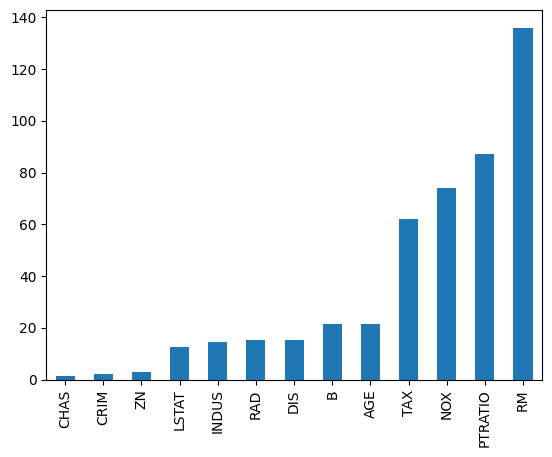

In [ ]:
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'bar')

<Axes: >

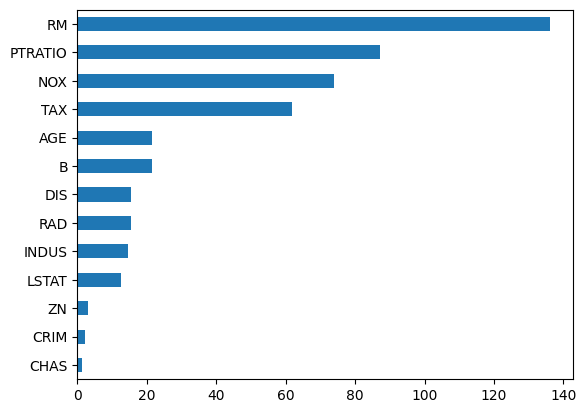

In [ ]:
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [ ]:
lr_model.score(x_test,y_test)

0.7415705829282704

In [ ]:
(y_test - y_pred) **2

4       76.003034
353     16.134372
289      7.295846
138      0.800110
169     19.707582
          ...    
237      0.584485
19       0.001329
311     19.143518
89       2.702977
365    188.326864
Name: PRICE, Length: 102, dtype: float64

In [ ]:
with open('linear_reg_model.pkl', 'wb') as f:
    pickle.dump(lin_reg_model, f)

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
with open('linear_reg_model.pkl', 'wb') as f:
    pickle.dump(lin_reg_model, f)

In [ ]:
lin_reg_model.intercept_

np.float64(38.18932287180819)

In [ ]:
lin_reg_model.coef_

array([-1.20636633e-01,  5.66373255e-02,  5.49039842e-02,  1.60277250e+00,
       -2.08802050e+01,  3.73381433e+00,  2.50010319e-03, -1.47196764e+00,
        3.14501588e-01, -1.28513801e-02, -9.90192379e-01,  9.64983972e-03,
       -4.79767028e-01])

In [ ]:
column_data = {
                'gender' : {'male':1, 'female':0},
                'smoker' : {'yes':1, 'no':0}
                }

with open('column_data.json', 'w') as f:
    json.dump(column_data, f)

In [11]:
df2=pd.read_csv('boston_data.csv')
df2

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [13]:
from sklearn.model_selection import train_test_split
x = df2[['AGE', 'PTRATIO', 'LSTAT']]   # features
y = df2['PRICE']        
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((404, 3), (102, 3))